### Load packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

### 1. Load a dataset from a CSV file

In [2]:
data = pd.read_csv("loanapp.csv")

In [3]:
#Check structure and for nulls
data.shape

(1988, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 18 columns):
Unnamed: 0                 1988 non-null int64
married                    1988 non-null object
race                       1988 non-null object
loan_decision              1988 non-null object
occupancy                  1988 non-null int64
loan_amount                1988 non-null int64
applicant_income           1988 non-null int64
num_units                  1988 non-null object
num_dependants             1988 non-null object
self_employed              1988 non-null bool
monthly_income             1988 non-null int64
purchase_price             1988 non-null float64
liquid_assets              1988 non-null float64
mortage_payment_history    1988 non-null int64
consumer_credit_history    1988 non-null int64
filed_bankruptcy           1988 non-null bool
property_type              1988 non-null int64
gender                     1988 non-null object
dtypes: bool(2), float64(2), int64(8), 

There are 18 columns, 1988 rows in this data set

In [5]:
data['Unnamed: 0'].describe()

count    1988.000000
mean      993.500000
std       574.030487
min         0.000000
25%       496.750000
50%       993.500000
75%      1490.250000
max      1987.000000
Name: Unnamed: 0, dtype: float64

In [6]:
#It appears that Unnamed: 0 is a index column, drop the index column, to not cloud analysis
data = data.drop(['Unnamed: 0'], axis=1)
data.columns

Index(['married', 'race', 'loan_decision', 'occupancy', 'loan_amount',
       'applicant_income', 'num_units', 'num_dependants', 'self_employed',
       'monthly_income', 'purchase_price', 'liquid_assets',
       'mortage_payment_history', 'consumer_credit_history',
       'filed_bankruptcy', 'property_type', 'gender'],
      dtype='object')

In [7]:
#Check sample data
data.head()

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
0,true,white,reject,1,128,74,1,1,False,4583,160.0,52.0,2,2,False,2,male
1,false,white,approve,1,128,84,1,0,False,2666,143.0,37.0,2,2,False,2,male
2,true,white,approve,1,66,36,1,0,True,3000,110.0,19.0,2,6,True,2,male
3,true,white,approve,1,120,59,1,0,False,2583,134.0,31.0,2,1,False,1,male
4,false,white,approve,1,111,63,1,0,False,2208,138.0,169.0,2,6,False,2,male


In [8]:
# add helper column
data['count'] = 1

In [9]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  12
Number of Categorical features:  6


In [10]:
print("These are numerical features: ")
print(data[numerical_feats].columns)

These are numerical features: 
Index(['occupancy', 'loan_amount', 'applicant_income', 'self_employed',
       'monthly_income', 'purchase_price', 'liquid_assets',
       'mortage_payment_history', 'consumer_credit_history',
       'filed_bankruptcy', 'property_type', 'count'],
      dtype='object')


In [11]:
print("These are categorical features: ")
print(data[categorical_feats].columns)

These are categorical features: 
Index(['married', 'race', 'loan_decision', 'num_units', 'num_dependants',
       'gender'],
      dtype='object')


In [12]:
#Retrieve sample of numerical features
data[numerical_feats].head()

,occupancy,loan_amount,applicant_income,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,count
0,1,128,74,False,4583,160.0,52.0,2,2,False,2,1
1,1,128,84,False,2666,143.0,37.0,2,2,False,2,1
2,1,66,36,True,3000,110.0,19.0,2,6,True,2,1
3,1,120,59,False,2583,134.0,31.0,2,1,False,1,1
4,1,111,63,False,2208,138.0,169.0,2,6,False,2,1


In [13]:
#retrieve sample of categorical features
data[categorical_feats].head()

,married,race,loan_decision,num_units,num_dependants,gender
0,true,white,reject,1,1,male
1,false,white,approve,1,0,male
2,true,white,approve,1,0,male
3,true,white,approve,1,0,male
4,false,white,approve,1,0,male


#### Num_units & num_dependents should be numeric, have_dependents could be categorical 
#### (as person would have different financial situation with or without dependents)

#### Self_employed & filed_bankruptcy should be categorical 

## Check unique values for columns and tranfer text to values

With linear regression as end goal, make categorical features in numerical categories

In [14]:
# retrieve unique values
data.filed_bankruptcy.unique()

array([False,  True])

In [15]:
# retrieve unique values
data.self_employed.unique()

array([False,  True])

In [16]:
#Function to change True/False to 1/0

def Liking(x):
    if str.lower(str(x)) == "true":
        return 1
    else:
        return 0 

In [17]:
#Traspose True/False to 1/0
data['self_employed'] =  data.self_employed.apply(Liking)

In [18]:
#Traspose True/False to 1/0
data['filed_bankruptcy'] =  data.filed_bankruptcy.apply(Liking)

In [19]:
# retrieve unique values
data.loan_decision.unique()

array(['reject', 'approve'], dtype=object)

In [20]:
#Function to traspose Approve/reject to 1/0

def SeekingApproval(x):
    if str.lower(str(x)) == "approve":
        return 1
    else:
        return 0 

In [21]:
#Function to traspose Approve/reject to 1/0
data['loan_decision'] =  data.loan_decision.apply(SeekingApproval)

In [22]:
# retrieve unique values
data.race.unique()

array(['white', 'black', 'hispan'], dtype=object)

In [23]:
# Encoding race to 0,1,2 would immply that one race is twice as other. Create seperate columns for each race
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(data["race"])
RaceA =pd.DataFrame(lb_results, columns=lb_style.classes_)
RaceA.head()

,black,hispan,white
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
#Join results back to data frame
data = data.join(RaceA)
data.head()

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,...,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender,count,black,hispan,white
0,true,white,0,1,128,74,1,1,0,4583,...,52.0,2,2,0,2,male,1,0,0,1
1,false,white,1,1,128,84,1,0,0,2666,...,37.0,2,2,0,2,male,1,0,0,1
2,true,white,1,1,66,36,1,0,1,3000,...,19.0,2,6,1,2,male,1,0,0,1
3,true,white,1,1,120,59,1,0,0,2583,...,31.0,2,1,0,1,male,1,0,0,1
4,false,white,1,1,111,63,1,0,0,2208,...,169.0,2,6,0,2,male,1,0,0,1


In [25]:
# retrieve unique values
data.married.unique()

array(['true', 'false', '.'], dtype=object)

In [26]:
# Even though that data.info() showed no NULLs in the data set, '.' should be treated as NULL
# Retrieve sample of missing data
data[data.married == '.']

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,...,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender,count,black,hispan,white
354,.,hispan,1,1,160,60,2,.,0,3816,...,39.0,2,6,1,3,male,1,0,1,0
757,.,white,1,1,158,50,.,.,0,4758,...,13.0,2,1,1,1,male,1,0,0,1
1390,.,white,1,1,170,120,.,.,0,10047,...,103.0,2,1,0,2,female,1,0,0,1


In [27]:
# Make a pivottable to try to see if any trends are present to predict marital status
data[['gender','race', 'married', 'loan_decision']].groupby(['gender','race', 'married'],as_index=False).count().sort_values(['race','gender','loan_decision'], ascending=False)

,gender,race,married,loan_decision
19,male,white,true,1012
18,male,white,false,361
17,male,white,.,1
10,female,white,false,204
11,female,white,true,91
9,female,white,.,1
3,.,white,false,5
4,.,white,true,5
16,male,hispan,true,66
15,male,hispan,false,20


In [28]:
# There are three missing marriatal stutuses. Most likely they were married. 
# However, I have previously worked with consumer loans and common practise was to reject when in doubt 
# and reavulate once they supply misisng documentation. If they truly fullfilled requirements loan is issued.
# And if applicant end up not meeting criteria -less work for debt collection 
# and debt recovery is expensive and labour intensive. 

data = data[~data.married.isin(['.']) == True]

In [29]:
# Check if dropping worked
data.married.unique()

array(['true', 'false'], dtype=object)

In [30]:
# True/false to 1/0
data['married'] =  data.married.apply(Liking)

In [31]:
# retrieve unique values
data.gender.unique()

array(['male', 'female', '.'], dtype=object)

In [32]:
# Drop missing genders. 
#There are not many of them and it would be emberassing to send welcome letter to customer with wrong title.

data = data[~data.gender.isin(['.']) == True]

In [33]:
#Function to traspose male/female to 1/0. 
# Again being female is not twice as awsome as being male, some would argue though

def itsamansworld(x):
    if str.lower(str(x)) == "male":
        return 1
    else:
        return 0 

In [34]:
#Create an extra column for binarized gender
data['gender2'] =  data.gender.apply(itsamansworld)

In [35]:
#retrieve unique values for units
data.num_units.unique()

array(['1', '2', '.', '3', '4'], dtype=object)

In [36]:
# Check how many misisng units we are talking about
data[data.num_units.isin(['.']) == True]

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,...,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender,count,black,hispan,white,gender2
106,1,white,0,1,100,38,.,0,0,1828,...,2,6,0,2,male,1,0,0,1,1
1497,1,white,0,1,70,70,.,4,0,2947,...,4,6,0,2,male,1,0,0,1,1


In [37]:
# Drop missing units, there are not lotof them and just to keep consistent with decissions made previously 
data = data[~data.num_units.isin(['.']) == True]
data.describe()

,married,loan_decision,occupancy,loan_amount,applicant_income,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,count,black,hispan,white,gender2
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.0,1969.000000,1969.000000,1969.000000,1969.000000
mean,0.659218,0.877095,1.031996,143.505333,84.908075,0.130523,5204.838497,196.748566,4664.390041,1.705942,2.110208,0.068563,1.862367,1.0,0.099035,0.054850,0.846115,0.813103
std,0.474093,0.328412,0.192576,80.802291,87.439115,0.336964,5290.834720,128.587218,67464.766307,0.554335,1.662151,0.252773,0.535195,0.0,0.298785,0.227745,0.360930,0.389928
min,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,25.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,100.000000,48.000000,0.000000,2876.000000,130.000000,20.000000,1.000000,1.000000,0.000000,2.000000,1.0,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,126.000000,64.000000,0.000000,3812.000000,163.000000,38.000000,2.000000,1.000000,0.000000,2.000000,1.0,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,165.000000,88.000000,0.000000,5600.000000,225.000000,83.000000,2.000000,2.000000,0.000000,2.000000,1.0,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,980.000000,972.000000,1.000000,81000.000000,1535.000000,1000000.000000,4.000000,6.000000,1.000000,3.000000,1.0,1.000000,1.000000,1.000000,1.000000


After cleaning, 19 records lost, which accounts for around 1% from inital data set. 

As Data entry errors are not many, effort spent trying to predict missing marriage status, gender and unit is greater than the difference in model output with and without these rows. 

Insights from this table:
1. 66% of applicants are married

2. 87.7% of applicats has their load approved

3. 13% of applicants are self employed

4. Under 7% of appliants have filled for bankruptcy

5. 84% of applicats are white, 10% black and 5% hispan

6. 81% of applicants are males

In [38]:
# create 2nd data frame for correlation matrix
# White will negative corralete with black

data2 = data[['married', 'loan_decision', 'occupancy', 'loan_amount',
       'applicant_income', 'num_units', 'num_dependants', 'self_employed',
       'monthly_income', 'purchase_price', 'liquid_assets',
       'mortage_payment_history', 'consumer_credit_history',
       'filed_bankruptcy', 'property_type']]

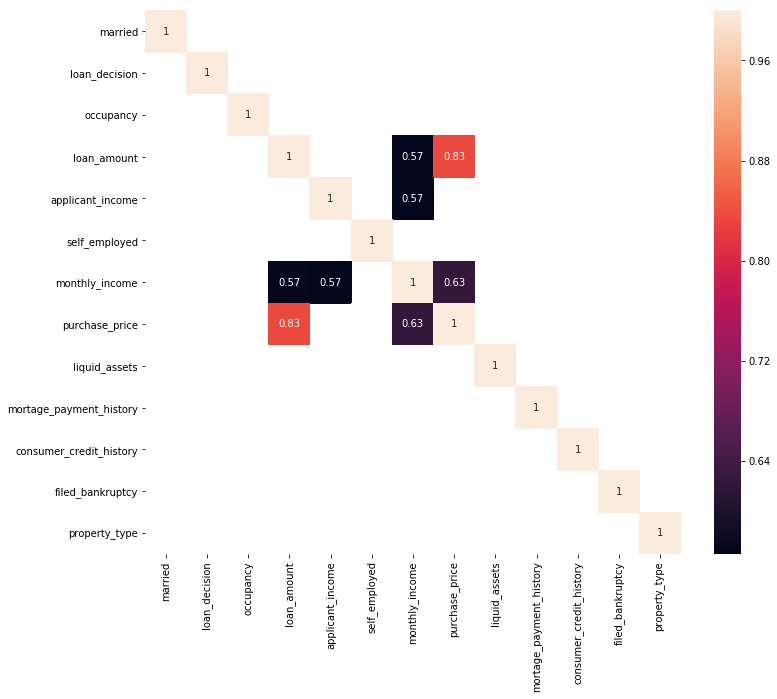

In [39]:
# calculate the correlation matrix, show only significant correlation
corr = data2.corr()

plt.figure(figsize=(12,10))
# plot the heatmap
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
        xticklabels=corr.columns,
        yticklabels=corr.columns
           ,annot=True)

Loan amount highly correalates with purchase price (0.83) & monthly_income (0.57)

Monthly income correlates with applicant income(0.57) 

Loan decision does not show strong correlation with any of the features

### Investigate distribution of monthly income and loan amount

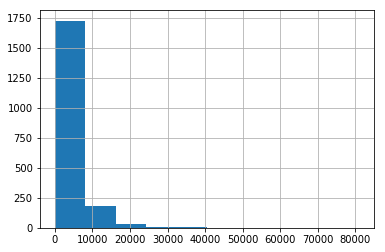

In [40]:
data.monthly_income.hist()

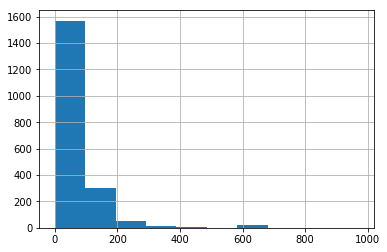

In [41]:
data.applicant_income.hist()

Distribution of monthly income is not normally distributed

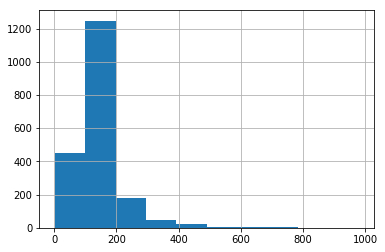

In [42]:
data.loan_amount.hist()

Loan amount is not normaly distrubted, 

### Investigate if loan decision is affected by gender

In [43]:
data.loan_decision[(data.gender2 == 1) & (data.loan_decision ==1 )].count()/data.loan_decision[(data.gender2 == 1)].count()

0.8800749531542785

In [44]:
data.loan_decision[(data.gender2 == 0) & (data.loan_decision ==1 )].count()/data.loan_decision[(data.gender2 == 0)].count()

0.8641304347826086

Even though females are under-represented in this data set, approval rate is similar.

88% for males and 86% for females.

### Investigate if loan decission is affected by number of dependants

In [45]:
cont_table = pd.crosstab(data['num_dependants'], data['loan_decision'])

# print the contingency table
cont_table

loan_decision,0,1
num_dependants,,
0,139,1026
1,37,277
2,40,285
3,19,106
4,7,23
5,0,5
6,0,3
7,0,1
8,0,1


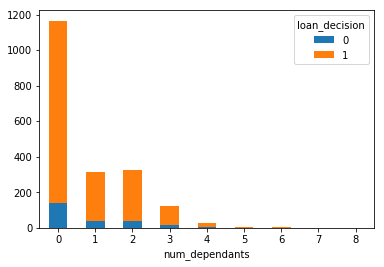

In [46]:
# Visualize contigency table
cont_table.plot(kind="bar", stacked=True, rot=0)

In [47]:
# Perform chi test
from scipy import stats
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print(f"p-value: {p_val}")

p-value: 0.6482511256513371


The p-value is greater than the usual significance level of 0.05. Therefore, **we accept the null hypothesis that there is no dependence between the number of dependants and loan decision**. Loan decision is not affected by number of dependents in this data set

### Investigate averege monthly income per race

In [48]:
# Make a pivottable to calculate average monthly income per race
Race = data[['race', 'monthly_income']].groupby(['race']).mean()
Race

,monthly_income
race,
black,4715.010256
hispan,4092.388889
white,5334.286915


In [49]:
chi2, p_val, dof, expected = stats.chi2_contingency(Race)
print(f"p-value: {p_val}")

p-value: 1.0


The p-value is greater than the usual significance level of 0.05. Therefore, **we accept the null hypothesis that there is no dependence between the race and monthly income**. Which shows how scewed is this data set and/or world in general

### Investigate if monthly income affects liquid assets

In [50]:
# perform paired t-test
t_val, p_val = stats.ttest_rel(data["monthly_income"], data["liquid_assets"])

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 0.3544932383991406, p-value: 0.723007250354225


We conclude that **we have to accept the null that there is no difference liquid assets and monthly income**. 

There is 72% similitarity between liquid assets mean with monthly incomes mean

### Implement a linear regression model

Number of dependants not used as it proved to be statistically insignificant

Applicant income not used as it correated with monthly income

In [51]:
model = sm.OLS.from_formula('loan_amount ~ married + occupancy + num_units +monthly_income + liquid_assets+purchase_price + mortage_payment_history + consumer_credit_history  + property_type +gender2+white', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     368.3
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:47:43   Log-Likelihood:                -10222.
No. Observations:                1969   AIC:                         2.047e+04
Df Residuals:                    1955   BIC:                         2.055e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  28.2234      8.381      3.368      0.001      11.787      44.660
num_units[T.2]              5.6288      5.160      1.091      0.275      -4.491      15.749
num_units[T.3]              8.7173      6.936      1.257      0.209      -4.886      22.321
num_units[T.4]             -3.6884     13.602     -0.271      0.786     -30.365      22.988
married                     3.7791      2.297      1.645      0.100      -0.726       8.285
occupancy                  -4.0592      5.245     -0.774      0.439     -14.345       6.227
monthly_income              0.0015      0.000      6.011      0.000       0.001       0.002
liquid_assets            3.021e-05   1.47e-05      2.054      0.040    1.37e-06     5.9e-05
purchase_price              0.4815      0.010     46.561      0.000       0.461       0.502
mortage_payment_history     0.2772      1.849      0.150      0.881      -3.350       3.904
consumer_credit_history     0.6318      0.607      1.042      0.298      -0.558       1.822
property_type               8.1582      2.422      3.369      0.001       3.409      12.907
gender2                     4.6217      2.730      1.693      0.091      -0.733       9.976
white                      -8.0003      2.826     -2.831      0.005     -13.542      -2.458
==============================================================================
Omnibus:                      746.667   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83640.754
Skew:                          -0.773   Prob(JB):                         0.00
Kurtosis:                      34.892   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

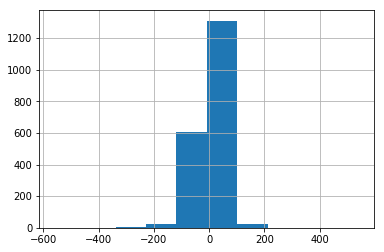

In [52]:
#Draw residual histogram for model
model.resid.hist()

### Assumptions about linear regression model

#### Coefficients on the variables

Loan amount is negatively affected by being white, having 4 units, occupancy type, by increasing these features loan amount reduces. 

Features like being married, credit history, property type among others increase loan amount


#### Quality of the model

R-squared:	0.710
R-squared:	0.708

Which is quite high prediction on the first run, without massive feature engineering. 
There is a warning about strong multicollinearity. To solve those additional documentation on features is needed, 
to deduct which  features logically thinking should affect other ones. 



#### Errors and residuals

Looking at the distribution of error on the scatterplot and histogram we can get the following assumptions:

Errors seem to be equally distributed around 0 but seem not to be normally distributed

However the p-value of the Jarque-Bera is 83640.754, which is greater than the significance level of 0.05

So, we can reject the null hypothesis of normal distribution